# The fast Fourier transform (FFT)

## Continous definition

Let's define the Fourier transform and its inverse as

$$F(k) = \dfrac{1}{\sqrt{2\pi}} \int f(x) e^{-i k x} dx$$

$$f(x) = \dfrac{1}{\sqrt{2\pi}} \int F(k) e^{+i k x} dk$$

## Periodicity in x space leads to discrete k

Their numerical counterparts are defined as the **Fourier series** rather than the continous Fourier transform, thus, it assumes a periodicity $f(x + L) = f(x)$. This leads to a constraint in $k$ that can be seen from

$$f(x+L) = \dfrac{1}{\sqrt{2\pi}} \int F(k) e^{+i k x} e^{+i k L} dk$$

which will satisfy $f(x + L) = f(x)$ only if $e^{+i k L} = 1$, thus

$$k \rightarrow k_n = k_0 + n \Delta k, \text{ with } \Delta k = \dfrac{2\pi}{L}, \text{ and } k_0 = n_0 \Delta k$$

Naturally, for large $L\rightarrow \infty$ we recover the continous definition above.

So far $n$ is unconstrained and runs over the full range $-\infty < n < \infty$.

## Discretization of x leads to periodicity in k

Now, let's assume that the coordinates $x$ are discrete, 

$$x \rightarrow x_j = a + j \Delta x$$

Here we consider the domain $a \leq x_j < a+L$, such that $x_0 = a$ and $x_N = a+L$. 

Therefore the index is set on $0 \leq j < N$. 

Notice that this are **semi-open intervals**: $x = [a, a+L)$ and $j = [0, N)$. This is due to the periodicitya above: $a$ and $a+L$ are the same point.

Consequently, the $k$ space is also periodic, with $F(k) = F(k+G)$ and $G = 2\pi/\Delta x$. Notice that $k$ and $k+G$ represent the same waves on a discrete lattice.

## Partial summary

Let's put together the periodicities and discretizations for reference:

1. Periodicity in x: $f(x+L) = f(x)$
1. Discretization of x: $x_j = a + j\Delta x$, with $\Delta x = L/N$
1. Domain of x: $x = [a, a+L)$
1. Range of j: $j = [0, N)$

--------------

1. Periodicity in k: $F(k+G) = F(k)$, with $G = \dfrac{2\pi}{\Delta x}$
1. Discretization of k: $k_n = k_0 + n \Delta k$, with $\Delta k = \dfrac{2\pi}{L}$
1. Domain of k: $k = [k_0, k_0 + G)$
1. Range of n: $n = [0, N)$

--------------

We have some freedom to choose the initial point in x and k, i.e. $a$ and $k_0$. But let's keep these there for a while.

## Discretize the integrals

Let's rewrite the continous Fourier transforms in terms of discrete sums using a simple rectangle rule

$$F(k) = \dfrac{1}{\sqrt{2\pi}} \int f(x) e^{-i k x} dx \rightarrow F(k_n) = \dfrac{\Delta x}{\sqrt{2\pi}} \sum_j f(x_j) e^{-i k_n x_j}$$

$$f(x) = \dfrac{1}{\sqrt{2\pi}} \int F(k) e^{+i k x} dk \rightarrow f(x_j) = \dfrac{\Delta k}{\sqrt{2\pi}} \sum_n F(k_n) e^{+i k_n x_j}$$

Now let's replace $k_n$ and $x_j$ by their definitions, and simplify the expressions using $f_j = f(x_j)$ and $F_n = F(k_n)$.

Notice that $k_n x_j = (k_0 + n \Delta k)(a + j \Delta x) = [a k_0 + n a \Delta k + j k_0 \Delta x] + n j \Delta k \Delta x = \phi_{nj} + 2\pi nj/N$

$$F_n = \dfrac{\Delta x}{\sqrt{2\pi}} \sum_j [f_j e^{-i\phi_{nj}}] e^{-i 2\pi nj/N}$$

$$f_j = \dfrac{\sqrt{2\pi}}{\Delta x} \dfrac{1}{N} \sum_n [F_n e^{+i\phi_{nj}}] e^{+i 2\pi nj/N}$$

Notice that the phase $\phi_{nj}$ vanishes if we choose $a=k_0=0$.

$$\phi_{nj} = [a k_0 + n a \Delta k + j k_0 \Delta x]$$


## The FFT implemented in numpy, scipy, fftw, etc...

See here: https://numpy.org/doc/stable/reference/routines.fft.html

The FFT is implemented using the expression from the **discrete Fourier transform (DFT)**, which reads

$$F_n = \dfrac{1}{C} \sum_j f_j e^{-i 2\pi nj/N}$$

$$f_j = \dfrac{C}{N} \sum_n F_n e^{+i 2\pi nj/N}$$

where $C$ is a normalization factor that can be choosed between:

- norm='forward' : $C = 1$
- norm='backward': $C = N$
- norm='ortho': $C = \sqrt{N}$

Which choice is better? Choose it to avoid floating point imprecisions. So depends on each case. You should try to keep both $f_j$ and $F_n$ near ~1.

## Comparing numpy's FFT with our discretized integrals

First, we see that numpy uses $\phi_{nj} = 0$, therefore it is simplied that the x and k domain start at $a = k_0 = 0$.

Second, there are differences in the normalization due to the factors $\Delta x/\sqrt{2\pi}$

**Do we need to care about this phase and difference in normalizations?** Not always... almost never. But yes...

- If you do **both**, one forward and one backward FFT, numerically, the phases and norms will cancel.

- If you do one of them analytically using the continous tranform and the other numerically, then you have to care about the phases and norms.

- If you do an odd number of numerical FFTs, you should care about the norms and phases (e.g., convolutions).

**A tip:** the initial point in x space is not always practical to set as $a=0$. Often we want to work on symmetric intervals, like $x=[-L/2, L/2)$, thus $a=L/2$. But it is usually simple to choose $k_0=0$, and we'll assume this simplicity here. So the phase simplifies to

$$\phi_{n} = a n \Delta k = a k_n$$

# Examples

Let's see how to use FFT and check when the norms and phases are relevant.

Let's start with $a=k_0=0$, which will give us domains:

- $x = \left[0, L\right)$
- $k = \left[0, \dfrac{2\pi}{\Delta x}\right)$

**WARNING:** the periodicity of k tell us that the range $k=[\pi, 2\pi)$ should match $k=[-\pi, 0)$, here I'm using $\Delta x=1$ for simplicity. Therefore, pay attention to the auxiliary functions

- `np.fft.fftfreq(...)` which help us build the array k with the sawtooth shape
- `np.fft.fftshift(...)` which help us switch between the domains $[0, 2\pi)$ to $[-\pi, \pi)$ for the plots.

In [1]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

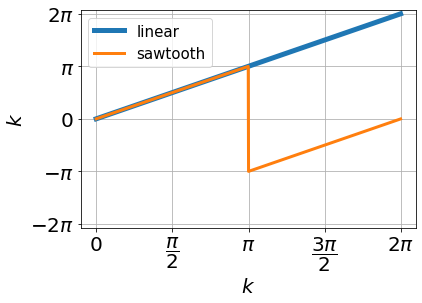

In [2]:
# Example of k with sawtooth shape

dx = 1
N = 1000

# DO NOT USE LINSPACE TO DRAW THE K ARRAY
k_linear = np.linspace(0, 2*np.pi/dx, N, endpoint=False)

# ALWAYS USE THE FFTFREQ TO GET THE SAWTOOTH SHAPE AUTOMATICALLY
k_sawtooth = fft.fftfreq(N)*2*np.pi/dx

plt.plot(k_linear, k_linear, lw=5, label='linear')
plt.plot(k_linear, k_sawtooth, lw=3, label='sawtooth')
plt.legend(fontsize=15)
plt.grid()
plt.ylim(-6.5,6.5)

plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], 
           ["0", R"$\dfrac{\pi}{2}$", R"$\pi$", R"$\dfrac{3\pi}{2}$", R"$2\pi$"])

plt.yticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi], 
           [R"$-2\pi$", R"$-\pi$", "0", R"$\pi$", R"$2\pi$"])

plt.xlabel(r'$k$')
plt.ylabel(r'$k$')
plt.show()

# Example 1: sin(x) and cos(x)

From the continuous definition of the Fourier transform, we have

$$f(x) = \sin(qx) \rightarrow F(k) = i\dfrac{\sqrt{2\pi}}{2}\big[ \delta(k+q) - \delta(k-q) \big]$$

There's also this quite useful property

$$g(x) = \dfrac{d}{dx}f(x) \rightarrow G(k) = ik F(k)$$

So, if we take $F(k)$ above, multiply it by $ik$ and take the inverse, we should get $g(x) = q\cos(qx)$.

Let's see

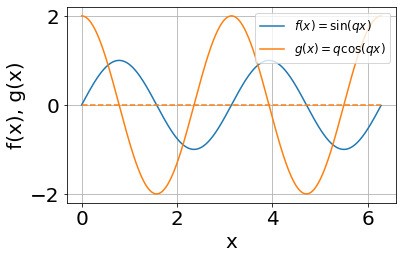

In [3]:
N = 1000
L = 2*np.pi
q = 2
dx = L/N

x = np.linspace(0, L, N, endpoint=False)
k = fft.fftfreq(N)*2*np.pi/dx

fx = np.sin(q*x)
Fk = fft.fft(fx)
Gk = 1j*k*Fk
gx = fft.ifft(Gk)

plt.plot(x, fx, label=r'$f(x)=\sin(qx)$')
plt.plot(x, gx.real, label=r'$g(x)=q\cos(qx)$')
plt.plot(x, gx.imag, c='C1', ls='--')
plt.xlabel('x')
plt.ylabel('f(x), g(x)')
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

**It seems to work well!**

Notice that above we have used the origins $a=k_0=0$, so we don't need to worry about the phase $\phi_{nj}$.

Also, since we did a forward and backward FFT, the norms cancel.

**But we are only looking at the x space.** How does $F(k)$ look in k space? Does it match the theoretical expression?

$$f(x) = \sin(qx) \rightarrow F(k) = i\dfrac{\sqrt{2\pi}}{2}\big[ \delta(k+q) - \delta(k-q) \big]$$

In [4]:
print('Expected intensity:', np.sqrt(2*np.pi)/2)

Expected intensity: 1.2533141373155001


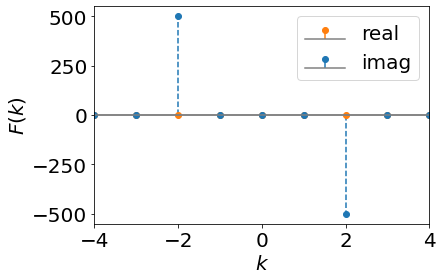

In [5]:
norm = 1 # dx/np.sqrt(2*np.pi)

plt.stem(k, norm*np.real(Fk), linefmt='C1--', basefmt='gray', markerfmt='C1o', label='real')
plt.stem(k, norm*np.imag(Fk), linefmt='C0--', basefmt='gray', markerfmt='C0o', label='imag')
plt.legend()
plt.xlim(-4,4)
plt.xlabel(r'$k$')
plt.ylabel(r'$F(k)$')
plt.show()

# Example 2: gaussian

Now let's do exactly the same, but for a gaussian function centered at $x=0$ and set on the domain $x=[-L/2, L/2)$.

$$f(x) = e^{-x^2} \rightarrow F(k) = \dfrac{1}{\sqrt{2}}e^{-k^2/4}$$

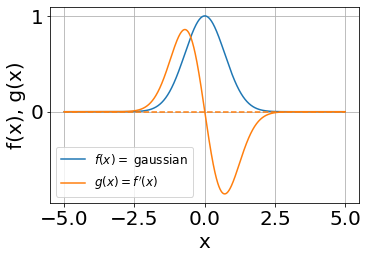

In [6]:
N = 1000
L = 10
dx = L/N

x = np.linspace(-L/2, L/2, N, endpoint=False)
k = fft.fftfreq(N)*2*np.pi/dx

fx = np.exp(-x**2)
Fk = fft.fft(fx)
Gk = 1j*k*Fk
gx = fft.ifft(Gk)

plt.plot(x, fx, label=r'$f(x)=$ gaussian')
plt.plot(x, gx.real, label=r'$g(x)=f^\prime(x)$')
plt.plot(x, gx.imag, c='C1', ls='--')
plt.xlabel('x')
plt.ylabel('f(x), g(x)')
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

**Again, it works fine:**

We still use $k_0=0$, but now $a=-L/2$, so the phase $\phi_{nj}$ is finite and reads as

$$\phi_{nj} = a k_0 + n a \Delta k + j k_0 \Delta x = n a \Delta k = -n \pi = -\dfrac{L}{2} k_n$$

But since we are doing a pair of FFT and IFFT, both the norm and the phase cancel.

**What about in k space?** Now we need to fix both the norm and phase.

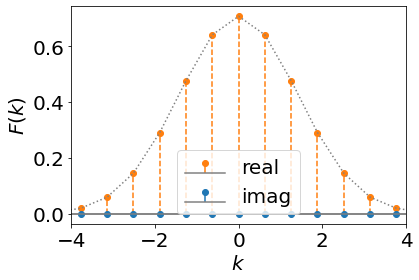

In [7]:
norm = dx/np.sqrt(2*np.pi)
phase = np.exp(1j*(-L/2)*k)

expected = np.exp(-k**2/4)/np.sqrt(2)

plt.stem(k, norm*np.real(Fk*phase), linefmt='C1--', basefmt='gray', markerfmt='C1o', label='real')
plt.stem(k, norm*np.imag(Fk*phase), linefmt='C0--', basefmt='gray', markerfmt='C0o', label='imag')
plt.plot(fft.fftshift(k), fft.fftshift(expected), ls=':', c='grey')
plt.legend()
plt.xlim(-4,4)
plt.xlabel(r'$k$')
plt.ylabel(r'$F(k)$')
plt.show()

# Example 4: convolutions

**This is the tricky case!**

The convolution is

$$h(x) = (f \star g)(x) = \int f(x')g(x-x') dx'$$

and its Fourier transform is

$$H(k) = \sqrt{2\pi} F(k) G(k)$$

Let's consider $f(x)$ as the step function and $g(x)$ the gaussian, which should give us

$$h(x) = \dfrac{\sqrt{\pi}}{2}[1 + {\rm erf}(x)]$$

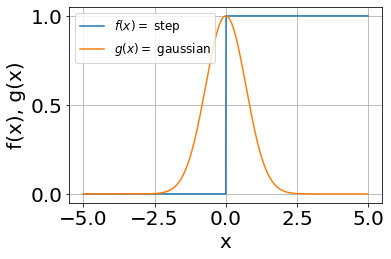

In [8]:
N = 1000
L = 10
q = 2
dx = L/N

x = np.linspace(-L/2, L/2, N, endpoint=False)
k = fft.fftfreq(N)*2*np.pi/dx

fx = np.heaviside(x, 0)
gx = np.exp(-x**2)

plt.plot(x, fx, label=r'$f(x)=$ step')
plt.plot(x, gx, label=r'$g(x)=$ gaussian')
plt.xlabel('x')
plt.ylabel('f(x), g(x)')
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

**Now let's blindly calculate** $H(k) = \sqrt{2\pi} F(k) G(k)$ and take the inverse to get the convolution.

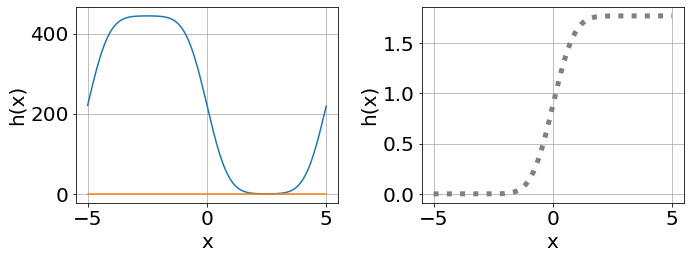

In [11]:
Fk = fft.fft(fx)
Gk = fft.fft(gx)
Hk = np.sqrt(2*np.pi) * Fk * Gk
hx = fft.ifft(Hk)

# import error function from scipy
from scipy.special import erf
expected = (np.sqrt(np.pi)/2)*(1+erf(x))

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(x, hx.real, label='real')
plt.plot(x, hx.imag, label='imag')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.grid()

plt.subplot(122)
plt.plot(x, expected, ls=':', c='grey', lw=5)
plt.xlabel('x')
plt.ylabel('h(x)')
plt.grid()

plt.tight_layout()
plt.show()

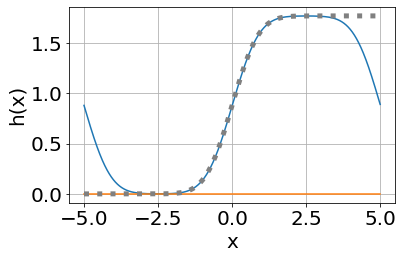

In [13]:
phase = np.exp(-1j*k*(-L/2))
norma = dx/np.sqrt(2*np.pi)

Fk = fft.fft(fx) * phase * norma
Gk = fft.fft(gx) * phase * norma
Hk = np.sqrt(2*np.pi) * Fk * Gk
hx = fft.ifft(Hk / phase / norma) 

# import error function from scipy
from scipy.special import erf
expected = (np.sqrt(np.pi)/2)*(1+erf(x))

plt.plot(x, hx.real, label='real')
plt.plot(x, hx.imag, label='imag')
plt.plot(x, expected, ls=':', c='grey', lw=5)
plt.xlabel('x')
plt.ylabel('h(x)')
plt.grid()

plt.tight_layout()
plt.show()